# **PROBLEM STATEMENT**

Build a model which help us to detect whether there is gearbox failure / not

by providing

DATE & TIME , ACTIVE POWER , WIND SPEED , AMBIENT TEMPERATURE , GEARBOX TEMPERATURE , NACELLE TEMPERATURE , BEARING A TEMPERATURE , BEARING B TEMPERATURE , BEARING SHAFT TEMPERATURE AND TURBINE STATUS

# **IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# **EXPLORE THE DATASET**

In [ ]:
df = pd.read_csv("/content/JOA_XV_09.csv")

**1ST 5 data**

In [ ]:
df.head()

,Date_Time,CGR_P_ACT,CGR_V_WIN,CGR_T_AMB,CGR_T_GEAR,CGR_T_NAC,CGR_T_BEAR_A,CGR_T_BEAR_B,CGR_T_BEAR_SHAFT,CGR_Toms_TurbineSt
0,2020-06-01 00:00:00.000,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0
1,2020-06-01 00:10:00.000,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0
2,2020-06-01 00:20:00.000,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0
3,2020-06-01 00:30:00.000,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0
4,2020-06-01 00:40:00.000,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0


**ROWS & COLUMN**

In [ ]:
df.shape

(30599, 10)

**LIST OF COLUMN NAMES**

In [ ]:
df.columns

Index(['Date_Time', 'CGR_P_ACT', 'CGR_V_WIN', 'CGR_T_AMB', 'CGR_T_GEAR',
       'CGR_T_NAC', 'CGR_T_BEAR_A', 'CGR_T_BEAR_B', 'CGR_T_BEAR_SHAFT',
       'CGR_Toms_TurbineSt'],
      dtype='object')

Column names to be changed

**DATASET INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30599 entries, 0 to 30598
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date_Time           30599 non-null  object 
 1   CGR_P_ACT           30386 non-null  float64
 2   CGR_V_WIN           30386 non-null  float64
 3   CGR_T_AMB           30386 non-null  float64
 4   CGR_T_GEAR          30386 non-null  float64
 5   CGR_T_NAC           30386 non-null  float64
 6   CGR_T_BEAR_A        30386 non-null  float64
 7   CGR_T_BEAR_B        30386 non-null  float64
 8   CGR_T_BEAR_SHAFT    30386 non-null  float64
 9   CGR_Toms_TurbineSt  25738 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.3+ MB


We need to change Date_Time column's datatype

Date_Time -> Timestamp

CGR_P_ACT -> Active power generated by the turbine

CGR_V_WIN -> Wind speed

CGR_T_AMB -> Ambient Temperature

CGR_T_GEAR -> Gearbox temperature

CGR_T_NAC -> Nacelle Temperature

CGR_T_BEAR_A -> Bearing A Tempeerature

CGR_T_BEAR_B -> Bearing B Temperatue

CGR_T_BEAR_SHAFT -> Bearing Shaft Temperature

CGR_Toms_TurgbineSt -> Turbine Status (0: Stopped, 1: Wind not available, 2: Producing, 6: No Communication)

**RENAMING THE COLUMNS**

In [ ]:
df.rename(columns={'CGR_P_ACT':'Active_Power',
                   'CGR_V_WIN':'Wind_Speed',
                   'CGR_T_AMB':'Ambient_Temperature',
                   'CGR_T_GEAR':'Gearbox_Temperature',
                   'CGR_T_NAC': 'Nacelle_Temperature',
                   'CGR_T_BEAR_A': 'Bearing_A_Temperature',
                   'CGR_T_BEAR_B': 'Bearing_B_Temperature',
                   'CGR_T_BEAR_SHAFT': 'Bearing_Shaft_Temperature',
                   'CGR_Toms_TurbineSt': 'Turbine_Status'} , inplace = True)

In [ ]:
df.columns

Index(['Date_Time', 'Active_Power', 'Wind_Speed', 'Ambient_Temperature',
       'Gearbox_Temperature', 'Nacelle_Temperature', 'Bearing_A_Temperature',
       'Bearing_B_Temperature', 'Bearing_Shaft_Temperature', 'Turbine_Status'],
      dtype='object')

**CHANGING DATE TIME COLUMN'S DATATYPE**

In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30599 entries, 0 to 30598
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date_Time                  30599 non-null  datetime64[ns]
 1   Active_Power               30386 non-null  float64       
 2   Wind_Speed                 30386 non-null  float64       
 3   Ambient_Temperature        30386 non-null  float64       
 4   Gearbox_Temperature        30386 non-null  float64       
 5   Nacelle_Temperature        30386 non-null  float64       
 6   Bearing_A_Temperature      30386 non-null  float64       
 7   Bearing_B_Temperature      30386 non-null  float64       
 8   Bearing_Shaft_Temperature  30386 non-null  float64       
 9   Turbine_Status             25738 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.3 MB


In [ ]:
df.head()

,Date_Time,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status
0,2020-06-01 00:00:00,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0
1,2020-06-01 00:10:00,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0
2,2020-06-01 00:20:00,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0
3,2020-06-01 00:30:00,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0
4,2020-06-01 00:40:00,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0


**FEATURE ADDITION**

In [ ]:
df['year'] = df['Date_Time'].dt.year
df['month'] = df['Date_Time'].dt.month
df['day'] = df['Date_Time'].dt.day
df['hour'] = df['Date_Time'].dt.hour
df['minute'] = df['Date_Time'].dt.minute
df['second'] = df['Date_Time'].dt.second

In [ ]:
df.head()

,Date_Time,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
0,2020-06-01 00:00:00,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0
1,2020-06-01 00:10:00,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0
2,2020-06-01 00:20:00,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0
3,2020-06-01 00:30:00,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0
4,2020-06-01 00:40:00,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0


In [ ]:
df.drop(columns=['Date_Time'] , axis = 1 , inplace = True)

In [ ]:
df.columns

Index(['Active_Power', 'Wind_Speed', 'Ambient_Temperature',
       'Gearbox_Temperature', 'Nacelle_Temperature', 'Bearing_A_Temperature',
       'Bearing_B_Temperature', 'Bearing_Shaft_Temperature', 'Turbine_Status',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

**CHECKING NULL VALUES**

In [ ]:
df.isnull().sum()

Active_Power                  213
Wind_Speed                    213
Ambient_Temperature           213
Gearbox_Temperature           213
Nacelle_Temperature           213
Bearing_A_Temperature         213
Bearing_B_Temperature         213
Bearing_Shaft_Temperature     213
Turbine_Status               4861
year                            0
month                           0
day                             0
hour                            0
minute                          0
second                          0
dtype: int64

**REMOVING NULL VALUES**

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Active_Power                 0
Wind_Speed                   0
Ambient_Temperature          0
Gearbox_Temperature          0
Nacelle_Temperature          0
Bearing_A_Temperature        0
Bearing_B_Temperature        0
Bearing_Shaft_Temperature    0
Turbine_Status               0
year                         0
month                        0
day                          0
hour                         0
minute                       0
second                       0
dtype: int64

# **BALANCE DATA / NOT**

In [ ]:
df['Turbine_Status'].value_counts()

2.0    23687
1.0     1561
0.0      277
Name: Turbine_Status, dtype: int64

In [ ]:
df_class_2 = df[df['Turbine_Status']==2]
df_class_1 = df[df['Turbine_Status']==1]
df_class_0 = df[df['Turbine_Status']==0]

In [ ]:
count_class_2, count_class_1 , count_class_0 = df.Turbine_Status.value_counts()

In [ ]:
print(count_class_2)
print(count_class_1)
print(count_class_0)

23687
1561
277


In [ ]:
df_class_2_under = df_class_2.sample(count_class_0)

In [ ]:
df_class_2_under['Turbine_Status'].value_counts()

2.0    277
Name: Turbine_Status, dtype: int64

In [ ]:
df_class_1_under = df_class_1.sample(count_class_0)

In [ ]:
df_class_1_under['Turbine_Status'].value_counts()

1.0    277
Name: Turbine_Status, dtype: int64

In [ ]:
df_test_under = pd.concat([df_class_2_under, df_class_1_under, df_class_0], axis=0)

In [ ]:
df_test_under['Turbine_Status'].value_counts()

2.0    277
1.0    277
0.0    277
Name: Turbine_Status, dtype: int64

# **INSIGHTS**

In [ ]:
df[df['Active_Power']==np.max(df['Active_Power'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
16574,1852.707,19.33167,20.04733,65.24733,24.40167,52.40433,66.74667,44.87567,2.0,2020,9,24,5,50,0


In [ ]:
df[df['Active_Power']==np.min(df['Active_Power'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
18892,-191.736,4.33,34.42567,57.408,38.67333,42.65033,46.05333,42.53733,1.0,2020,10,10,14,0,0


In [ ]:
df[df['Wind_Speed']==np.max(df['Wind_Speed'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
9691,1786.544,25.81425,17.963,60.02125,21.3195,45.9685,57.71925,41.558,2.0,2020,8,7,7,20,0


In [ ]:
df[df['Wind_Speed']==np.min(df['Wind_Speed'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
19032,-8.823667,0.0,32.83167,59.57734,34.01400,39.91633,43.9670,42.14967,1.0,2020,10,11,13,20,0
21047,-6.377500,0.0,33.45700,60.33350,39.79550,42.90900,46.4250,42.31400,1.0,2020,10,25,15,10,0
21300,0.000000,0.0,23.97500,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,2020,10,27,9,30,0
21495,-10.285000,0.0,28.29500,58.47400,31.11200,43.62100,47.5470,42.25900,1.0,2020,10,28,18,0,0
21894,-6.759000,0.0,34.09400,60.86000,37.86600,39.63900,43.0380,41.76300,1.0,2020,10,31,12,30,0
21907,-10.360500,0.0,32.79000,59.39700,38.52850,42.16050,44.9000,42.05450,1.0,2020,10,31,14,40,0
22075,-5.435500,0.0,31.98650,56.32200,41.68950,46.24300,49.4455,42.56950,1.0,2020,11,1,18,40,0
22341,-6.782000,0.0,31.43800,58.60000,37.67200,41.21600,43.9710,39.99600,0.0,2020,11,3,15,0,0
22469,-8.746000,0.0,21.16850,56.72700,25.16400,35.57500,41.7885,39.00100,1.0,2020,11,4,12,20,0
22476,-5.317500,0.0,21.92850,53.01600,31.60300,34.52850,38.7180,37.38650,1.0,2020,11,4,13,30,0


In [ ]:
df[df['Ambient_Temperature']==np.max(df['Ambient_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21037,-7.4,0.0385,36.3595,57.7205,39.208,41.95,45.347,42.316,1.0,2020,10,25,13,30,0


In [ ]:
df[df['Ambient_Temperature']==np.min(df['Ambient_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
10256,1599.556,10.453,16.486,63.56375,21.385,45.68675,53.842,42.707,2.0,2020,8,11,5,30,0


In [ ]:
df[df['Gearbox_Temperature']==np.max(df['Gearbox_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
17111,1775.901,12.92975,25.2545,68.52375,29.58025,60.3,68.97975,46.2955,2.0,2020,9,28,0,0,0


In [ ]:
df[df['Gearbox_Temperature']==np.min(df['Gearbox_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


In [ ]:
df[df['Nacelle_Temperature']==np.max(df['Nacelle_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
22076,-5.432,0.439,31.499,55.94,41.74,46.206,49.461,42.4395,1.0,2020,11,1,18,50,0


In [ ]:
df[df['Nacelle_Temperature']==np.min(df['Nacelle_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


In [ ]:
df[df['Bearing_A_Temperature']==np.max(df['Bearing_A_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
16099,1776.555,9.912333,27.84067,68.49167,32.00333,62.25533,67.624,46.48867,2.0,2020,9,20,22,30,0


In [ ]:
df[df['Bearing_A_Temperature']==np.min(df['Bearing_A_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


In [ ]:
df[df['Bearing_B_Temperature']==np.max(df['Bearing_B_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
7018,1771.709,13.1374,24.751,64.7756,28.7902,60.938,82.175,44.5296,2.0,2020,7,19,17,40,0


In [ ]:
df[df['Bearing_B_Temperature']==np.min(df['Bearing_B_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


In [ ]:
df[df['Bearing_Shaft_Temperature']==np.max(df['Bearing_Shaft_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
16120,1772.814,12.02967,25.74667,66.28567,29.50867,55.058,70.53467,47.00566,2.0,2020,9,21,2,0,0


In [ ]:
df[df['Bearing_Shaft_Temperature']==np.min(df['Bearing_Shaft_Temperature'])]

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


# **CORRELATION**

In [ ]:
df.corr()

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second
Active_Power,1.000000,0.825117,-0.642688,0.640442,-0.633528,0.653323,0.830112,0.540872,0.399055,NaN,-0.637228,-0.020393,-0.186599,0.000478,NaN
Wind_Speed,0.825117,1.000000,-0.685695,0.504419,-0.684628,0.459733,0.643787,0.398863,0.297800,NaN,-0.445674,-0.015662,-0.341112,0.002707,NaN
Ambient_Temperature,-0.642688,-0.685695,1.000000,-0.285583,0.908828,-0.178264,-0.439802,-0.074197,-0.206442,NaN,0.369749,0.038051,0.497015,-0.000055,NaN
Gearbox_Temperature,0.640442,0.504419,-0.285583,1.000000,-0.293406,0.503768,0.540898,0.618401,0.436932,NaN,-0.228869,0.055181,-0.039869,0.000209,NaN
Nacelle_Temperature,-0.633528,-0.684628,0.908828,-0.293406,1.000000,-0.106912,-0.394557,-0.096646,-0.400333,NaN,0.353160,0.037567,0.501873,-0.000684,NaN
Bearing_A_Temperature,0.653323,0.459733,-0.178264,0.503768,-0.106912,1.000000,0.818202,0.577436,0.143224,NaN,-0.496331,-0.007421,0.043125,-0.000776,NaN
Bearing_B_Temperature,0.830112,0.643787,-0.439802,0.540898,-0.394557,0.818202,1.000000,0.601826,0.245552,NaN,-0.659749,-0.022517,-0.120255,-0.000833,NaN
Bearing_Shaft_Temperature,0.540872,0.398863,-0.074197,0.618401,-0.096646,0.577436,0.601826,1.000000,0.393237,NaN,-0.319472,0.084704,0.052427,-0.000341,NaN
Turbine_Status,0.399055,0.297800,-0.206442,0.436932,-0.400333,0.143224,0.245552,0.393237,1.000000,NaN,-0.181000,0.003312,-0.050427,0.003449,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

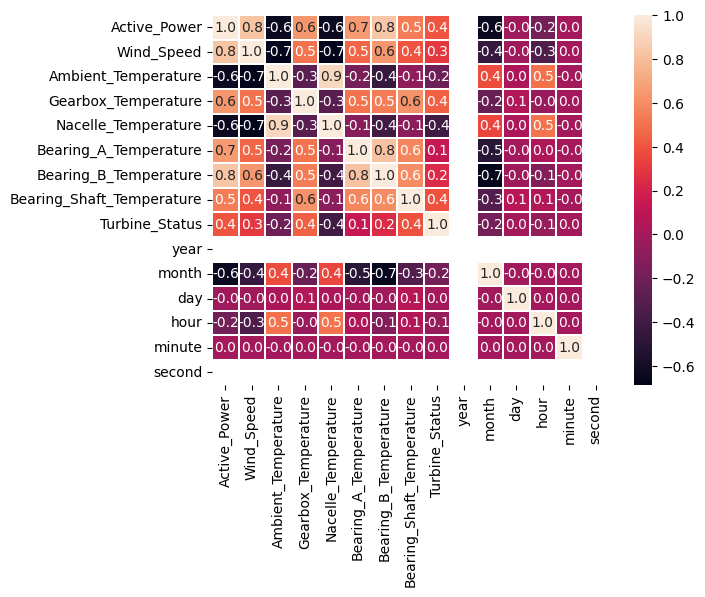

In [ ]:
sns.heatmap(data = df.corr() , annot = True , linewidths = 0.1 , fmt = '.1f')

# **MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

**CALCULATING THRESHOLD**

In [ ]:
# THRESHOLD FOR GEARBOX TEMPERATURE

q1 = np.percentile(df['Gearbox_Temperature'] , 25)
q3 = np.percentile(df['Gearbox_Temperature'] , 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

thresh_gearbox = upper

In [ ]:
# THRESHOLD FOR ACTIVE POWER

q1a = np.percentile(df['Active_Power'] , 25)
q3a = np.percentile(df['Active_Power'] , 75)
iqra = q3a - q1a

lowera = q1a - 1.5 * iqra
uppera = q3a + 1.5 * iqra

thresh_active = uppera

In [ ]:
# THRESHOLD FOR WIND SPEED

q1w = np.percentile(df['Wind_Speed'] , 25)
q3w = np.percentile(df['Wind_Speed'] , 75)
iqrw = q3w - q1w

lowerw = q1w - 1.5 * iqrw
upperw = q3w + 1.5 * iqrw

thresh_wind = upperw

In [ ]:
# THRESHOLD FOR AMBIENT TEMPERATURE

q1am = np.percentile(df['Ambient_Temperature'] , 25)
q3am = np.percentile(df['Ambient_Temperature'] , 75)
iqram = q3am - q1am

loweram = q1am - 1.5 * iqram
upperam = q3am + 1.5 * iqram

thresh_ambient = upperam

In [ ]:
# THRESHOLD FOR NACCELLE TEMPERATURE

q1n = np.percentile(df['Nacelle_Temperature'] , 25)
q3n = np.percentile(df['Nacelle_Temperature'] , 75)
iqrn = q3n - q1n

lowern = q1n - 1.5 * iqrn
uppern = q3n + 1.5 * iqrn

thresh_naccelle = uppern

In [ ]:
# THRESHOLD FOR BEARING A TEMPERATURE

q1ba = np.percentile(df['Bearing_A_Temperature'] , 25)
q3ba = np.percentile(df['Bearing_A_Temperature'] , 75)
iqrba = q3ba - q1ba

lowerba = q1ba - 1.5 * iqrba
upperba = q3ba + 1.5 * iqrba

thresh_bearinga = upperba

In [ ]:
# THRESHOLD FOR BEARING B TEMPERATURE

q1bb = np.percentile(df['Bearing_B_Temperature'] , 25)
q3bb = np.percentile(df['Bearing_B_Temperature'] , 75)
iqrbb = q3bb - q1bb

lowerbb = q1bb - 1.5 * iqrbb
upperbb = q3bb + 1.5 * iqrbb

thresh_bearingb = upperbb

In [ ]:
# THRESHOLD FOR BEARING SHAFT TEMPERATURE

q1bs = np.percentile(df['Bearing_Shaft_Temperature'] , 25)
q3bs = np.percentile(df['Bearing_Shaft_Temperature'] , 75)
iqrbs = q3bs - q1bs

lowerbs = q1bs - 1.5 * iqrbs
upperbs = q3bs + 1.5 * iqrbs

thresh_bearing_shaft = upperbs

In [ ]:
df.columns

Index(['Active_Power', 'Wind_Speed', 'Ambient_Temperature',
       'Gearbox_Temperature', 'Nacelle_Temperature', 'Bearing_A_Temperature',
       'Bearing_B_Temperature', 'Bearing_Shaft_Temperature', 'Turbine_Status',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'thres_exceed',
       'threshold_exceeded'],
      dtype='object')

In [ ]:
THRES = {
    'Active_Power': thresh_active,  # threshold for active power
    'Wind_Speed': thresh_wind,  # threshold for wind speed
    'Ambient_Temperature': thresh_ambient,  # threshold for ambient temperature
    'Gearbox_Temperature': thresh_gearbox,  # threshold for gearbox temperature
    'Nacelle_Temperature': thresh_naccelle,  # threshold for nacelle temperature
    'Bearing_A_Temperature': thresh_bearinga,  # threshold for bearing A temperature
    'Bearing_B_Temperature': thresh_bearingb,  # threshold for bearing B temperature
    'Bearing_Shaft_Temperature': thresh_bearing_shaft  # threshold for bearing shaft temperature
}

In [ ]:
df['threshold_exceeded'] = 0  # Initialize with 0

In [ ]:
# Check if any of the variables exceed the respective threshold and set the new column accordingly

for var, THRES in THRES.items():
    df.loc[df[var] > THRES, 'threshold_exceeded'] = 1

In [ ]:
df.drop(columns=['thres_exceed'] , axis = 1 , inplace = True)

In [ ]:
df.head()

,Active_Power,Wind_Speed,Ambient_Temperature,Gearbox_Temperature,Nacelle_Temperature,Bearing_A_Temperature,Bearing_B_Temperature,Bearing_Shaft_Temperature,Turbine_Status,year,month,day,hour,minute,second,threshold_exceeded
0,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0,0
1,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0,0
2,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0,0
3,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0,0
4,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0,0


In [ ]:
df.columns

Index(['Active_Power', 'Wind_Speed', 'Ambient_Temperature',
       'Gearbox_Temperature', 'Nacelle_Temperature', 'Bearing_A_Temperature',
       'Bearing_B_Temperature', 'Bearing_Shaft_Temperature', 'Turbine_Status',
       'year', 'month', 'day', 'hour', 'minute', 'second',
       'threshold_exceeded'],
      dtype='object')

**SPLITING TRAIN & TEST DATASET**

In [ ]:
x = df[['Active_Power', 'Wind_Speed', 'Ambient_Temperature',
       'Gearbox_Temperature', 'Nacelle_Temperature', 'Bearing_A_Temperature',
       'Bearing_B_Temperature', 'Bearing_Shaft_Temperature', 'Turbine_Status',
       'year', 'month', 'day', 'hour', 'minute', 'second']]

y = df['threshold_exceeded']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 2)

**HYPERPARAMETER TUNING - GRIDSEARCHCV**

**DECISION TREE CLASSIFIER**

In [ ]:
dt = GridSearchCV( DecisionTreeClassifier(), {
    'criterion':['gini','entropy','log_loss'],
    'splitter' : ['best','random']
}, cv = 5)

In [ ]:
dt.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

**BEST PARAMETER**

In [ ]:
dt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

**TRAIN THE MODEL**

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')

In [ ]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

**MODEL SCORE**

In [ ]:
dtc.score(x_test , y_test)

1.0

**LOGISTIC REGRESSION**

In [ ]:
lr = GridSearchCV( LogisticRegression() , {
    'penalty':['l1','l2','elasticnet','None']
} , cv = 5)

In [ ]:
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'None']})

**BEST PARAMETER**

In [ ]:
lr.best_params_

{'penalty': 'l2'}

In [ ]:
lrc = LogisticRegression(penalty = 'l2')

**TRAIN THE MODEL**

In [ ]:
lrc.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**MODEL SCORE**

In [ ]:
lrc.score(x_test , y_test)

0.9811949069539667